In [1]:
import pandas as pd

In [2]:
ev_data = pd.read_csv('ev_data.csv')

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
ev_data = ev_data.dropna()

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

C:\Users\irt\AppData\Local\Temp\ipykernel_21260\1428616447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = 'viridis')


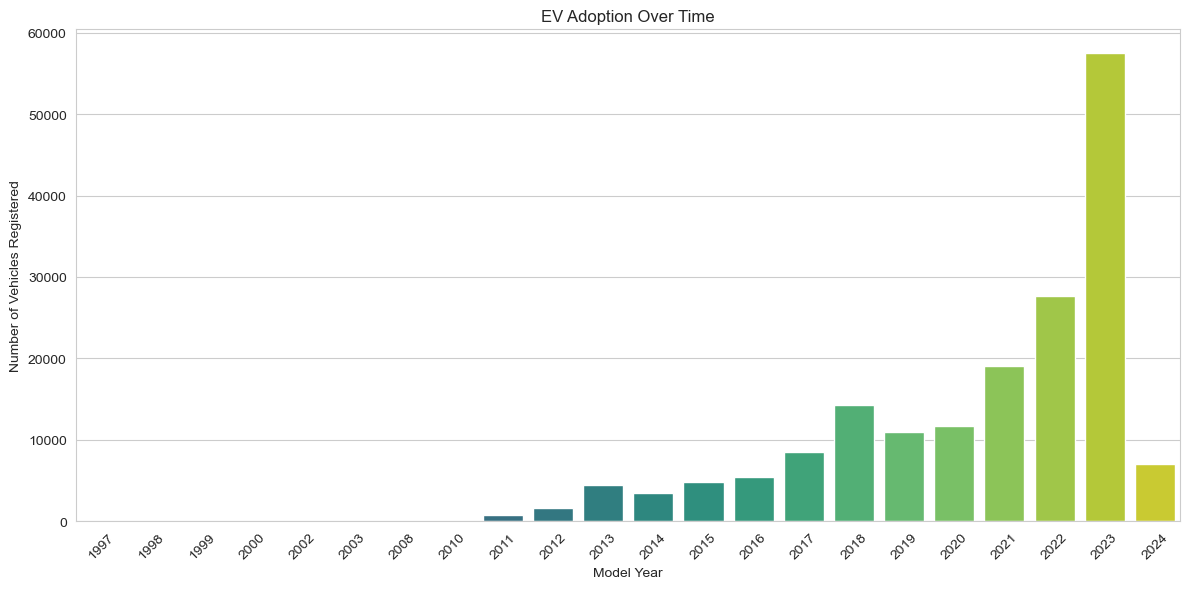

In [9]:
## EV Adoption over time 
plt.figure(figsize = (12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = 'viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.xticks(rotation = 45)
plt.ylabel('Number of Vehicles Registered')
plt.tight_layout()
plt.show()

In [10]:
# Geographical Distribution at county level
ev_county_distribution = ev_data['County'].value_counts().head(3).index

In [11]:
# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(ev_county_distribution)]

In [12]:
# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending = False).reset_index(name = 'Number of vehicles Registered')

In [13]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

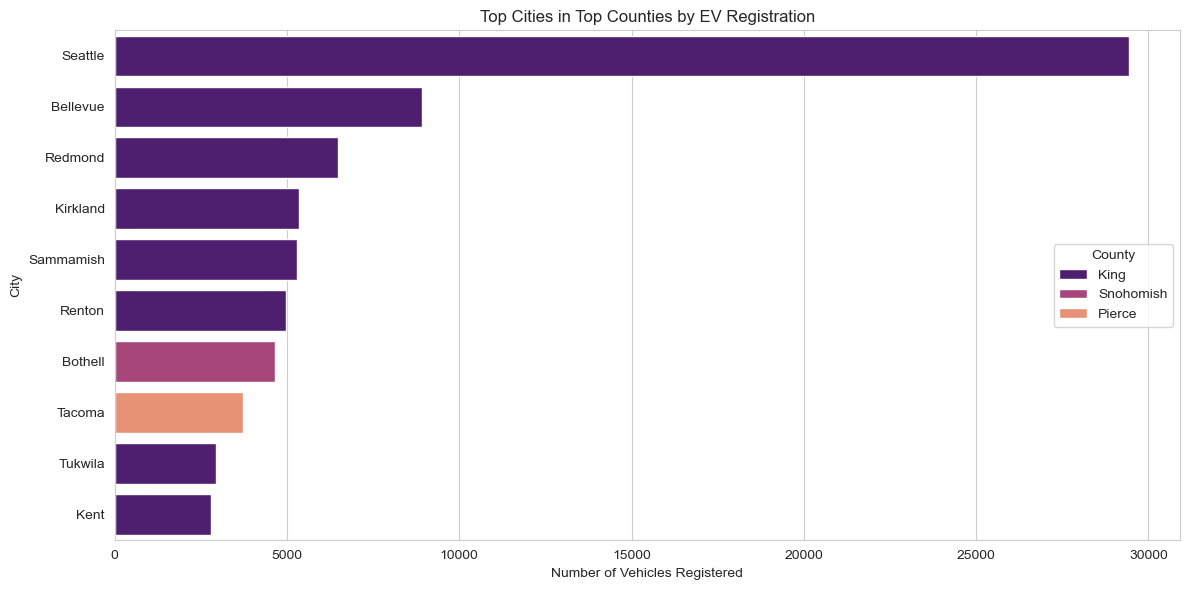

In [14]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Number of vehicles Registered', y = 'City', hue = 'County', data = top_cities, palette = 'magma')
plt.title('Top Cities in Top Counties by EV Registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title = 'County', loc = 'center right')
plt.tight_layout()
plt.show()

In [15]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

C:\Users\irt\AppData\Local\Temp\ipykernel_21260\1774059421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_type_distribution.index, y = ev_type_distribution.values, palette = 'rocket')


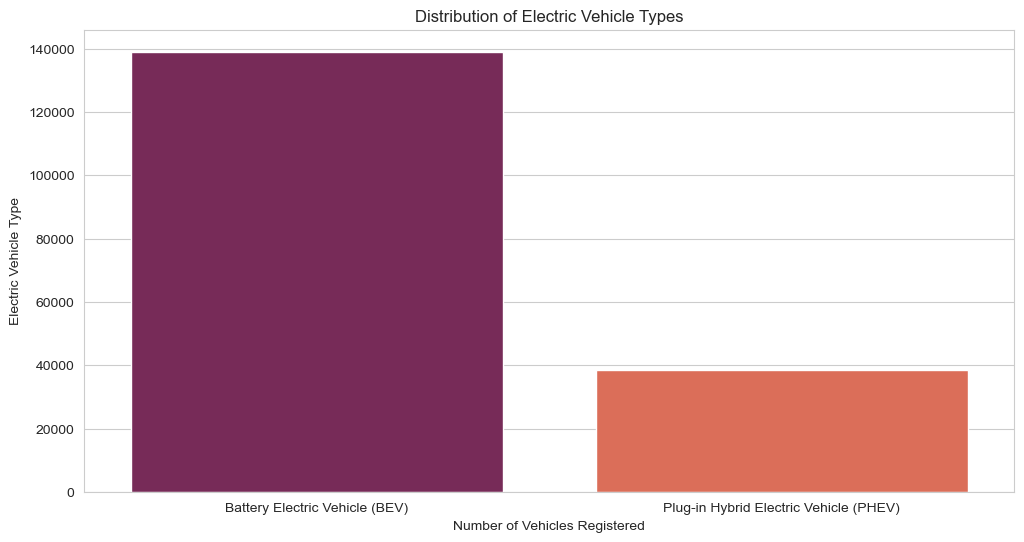

In [16]:
plt.figure(figsize = (12,6))
sns.barplot(x = ev_type_distribution.index, y = ev_type_distribution.values, palette = 'rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.show()

In [17]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

C:\Users\irt\AppData\Local\Temp\ipykernel_21260\3453506934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_make_distribution.values, y = ev_make_distribution.index, palette = 'cubehelix')


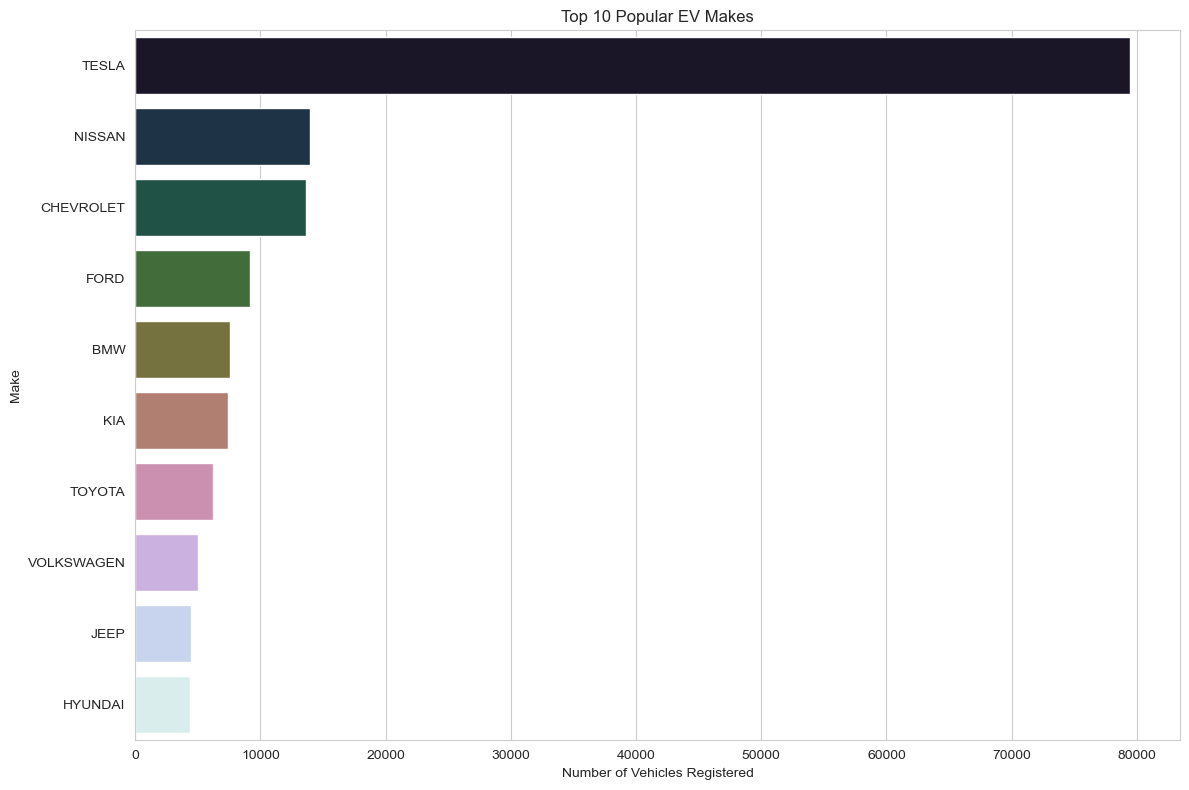

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(x = ev_make_distribution.values, y = ev_make_distribution.index, palette = 'cubehelix')
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [19]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

In [20]:
# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

In [21]:
# analyzing the popularity of EV models within these top manufacturers
ev_models = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending = False).reset_index(name = 'Number of vehicles').head(10)

In [22]:
ev_models

,Make,Model,Number of vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


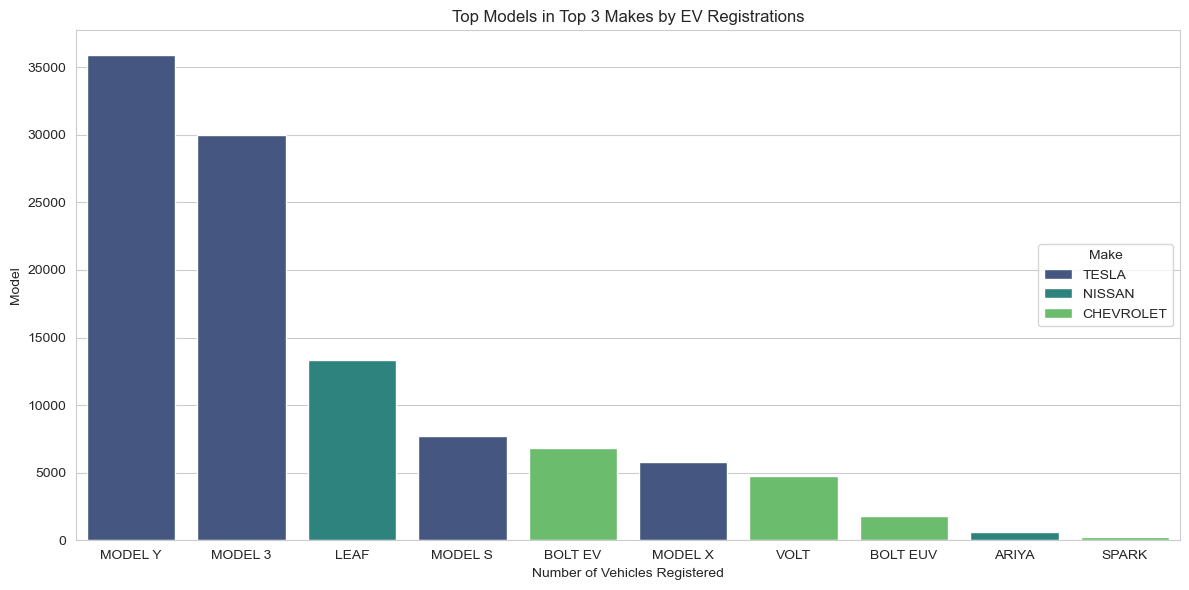

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Model', y = 'Number of vehicles', hue = 'Make', data = ev_models, palette = 'viridis')
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.tight_layout()
plt.show()

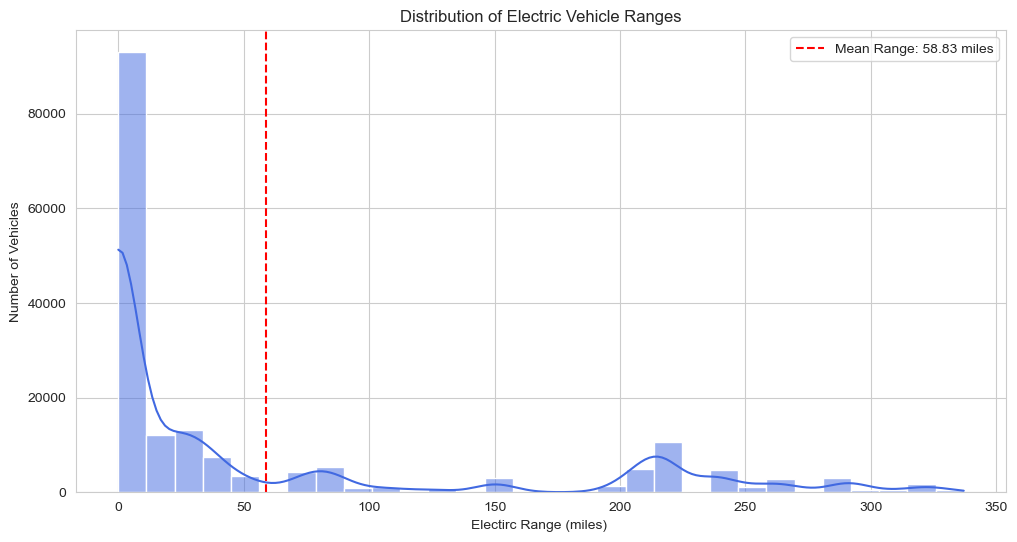

In [72]:
#analyzing the distribution of eletric range
plt.figure(figsize = (12,6))
sns.histplot(ev_data['Electric Range'], bins = 30, kde = True, color = 'royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electirc Range (miles) ')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color = 'red', linestyle = '--', label = f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

In [82]:
# calculating the average electric range by model
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

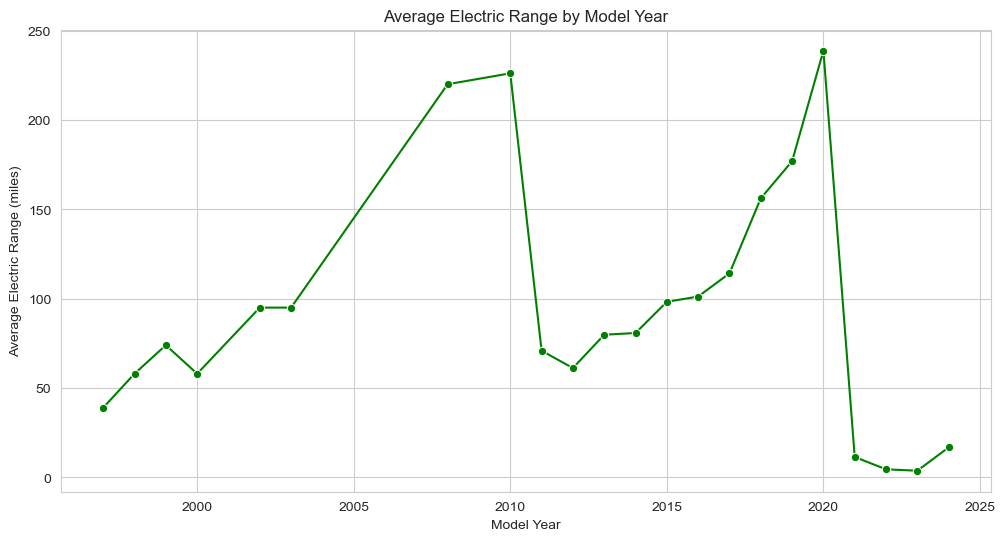

In [92]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Model Year', y = 'Electric Range', data = average_range_by_year, marker = 'o', color = 'green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.show()

In [104]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending = False).reset_index()

In [108]:
top_range_models = average_range_by_model.head(10)

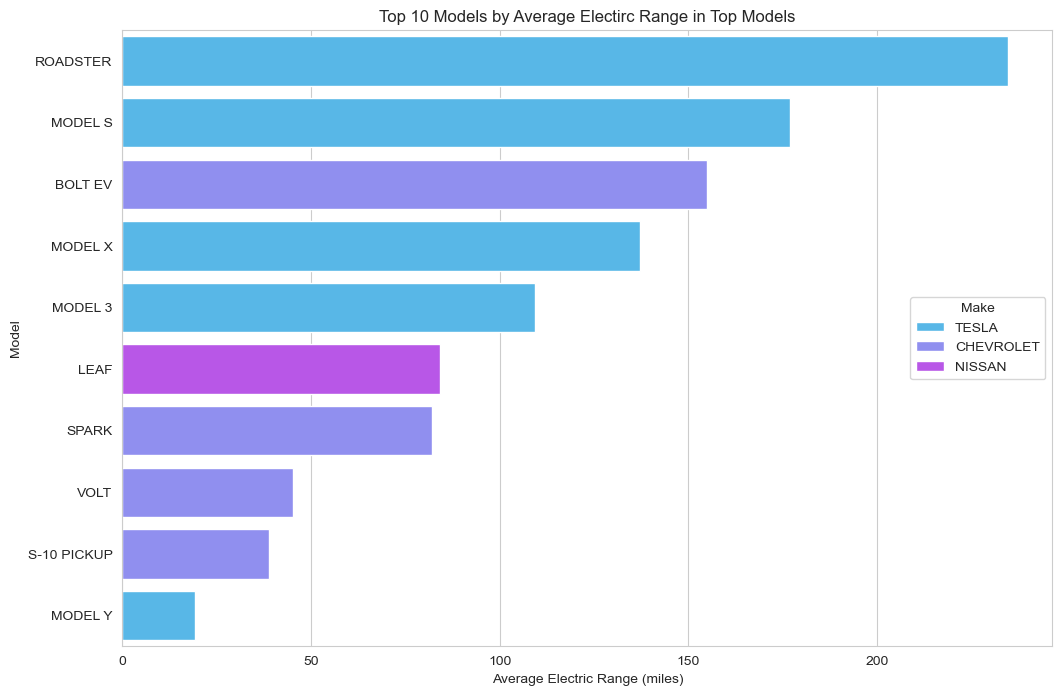

In [118]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Electric Range', y = 'Model', hue = 'Make', data = top_range_models, palette = 'cool')
plt.title('Top 10 Models by Average Electirc Range in Top Models')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.show()

## Estimated Market Size Analysis of Electric Vehicles in the United States

In [125]:
# Calculate the nunber of Evs registered each year
ev_registration_count =  ev_data['Model Year'].value_counts().sort_index()

In [127]:
ev_registration_count

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [133]:
from scipy.optimize import curve_fit
import numpy as np

filtered_years = ev_registration_count[ev_registration_count.index <=2023]

In [135]:
# Define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [139]:
# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()

In [143]:
y_data = filtered_years.values

In [145]:
# fit the data to the exponential growth funtion
params, covarinace = curve_fit(exp_growth, x_data, y_data)

In [149]:
# use the fitted fucntion to forecast the number of EVs 
forecast_years = np.arange(2024, 2024+6) - filtered_years.index.min()

In [151]:
forecasted_values = exp_growth(forecast_years, *params)

In [165]:
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

In [171]:
forecasted_evs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

In [179]:
# prepare data for plotting
years =np.arange(filtered_years.index.min(), 2029 +1)

In [183]:
actual_years = filtered_years.index

In [187]:
forecasted_years_full = np.arange(2024, 2029 + 1)

In [189]:
actual_values = filtered_years.values

In [195]:
forecasted_values_full = [forecasted_evs[year] for year in forecasted_years_full]

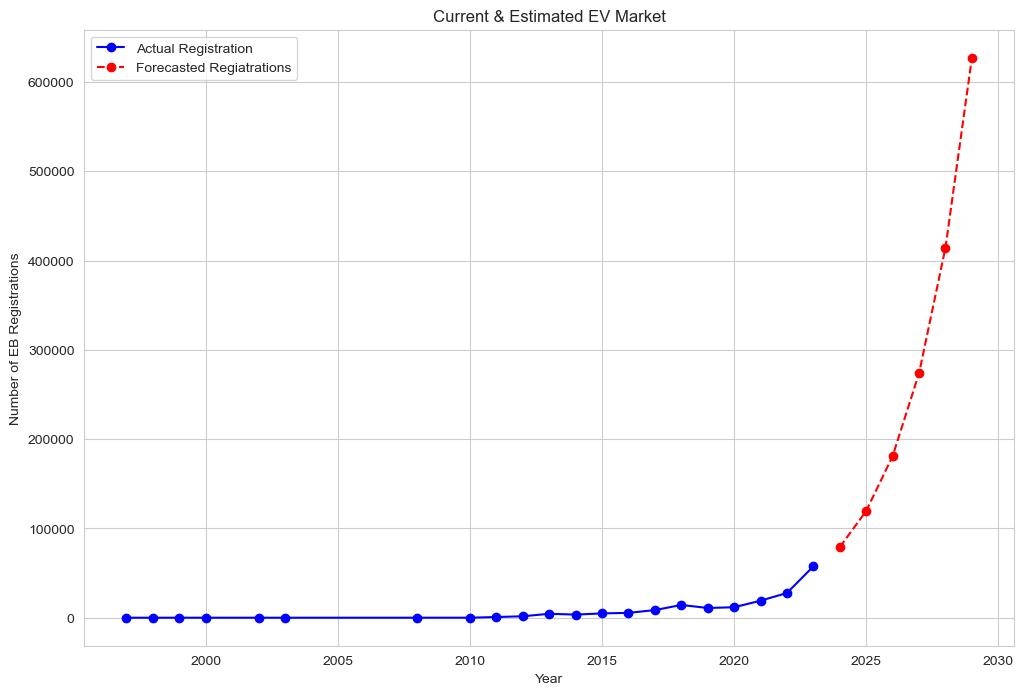

In [213]:
plt.figure(figsize = (12, 8))
plt.plot(actual_years, actual_values, 'bo-', label = 'Actual Registration')
plt.plot(forecasted_years_full, forecasted_values_full, 'ro--', label = 'Forecasted Regiatrations')


plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EB Registrations')
plt.legend()
plt.show()